In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf

## Exploratory Data Analysis (EDA)

In [2]:
df = pd.read_csv("Data/Super_Store_data.csv", encoding="latin1")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [3]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [4]:
df.shape

(2121, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [6]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [7]:
df.duplicated().any()

False

In [8]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [9]:
segment_sales = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
City_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
Sub_Category_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)


segment_Quantity = df.groupby('Segment')['Quantity'].sum().sort_values(ascending=False)
City_Quantity = df.groupby('State')['Quantity'].sum().sort_values(ascending=False)
Sub_Category_Quantity = df.groupby('Sub-Category')['Quantity'].sum().sort_values(ascending=False)

In [10]:
def plot(group,title,xlabel,ylabel,xSize=20,ySize=6):
    plt.figure(figsize=(xSize,ySize))
    plt.subplot(1,3,1)
    plt.subplot(1,3,1)
    group.plot(kind='bar',color='green')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

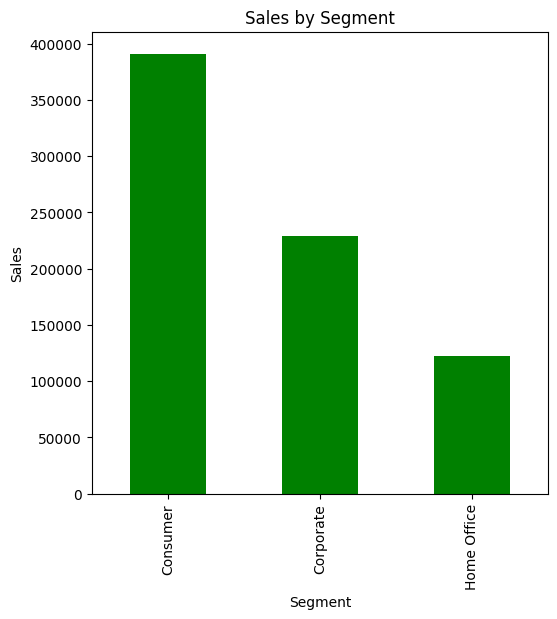

In [11]:
plot(segment_sales,'Sales by Segment',"Segment",'Sales')

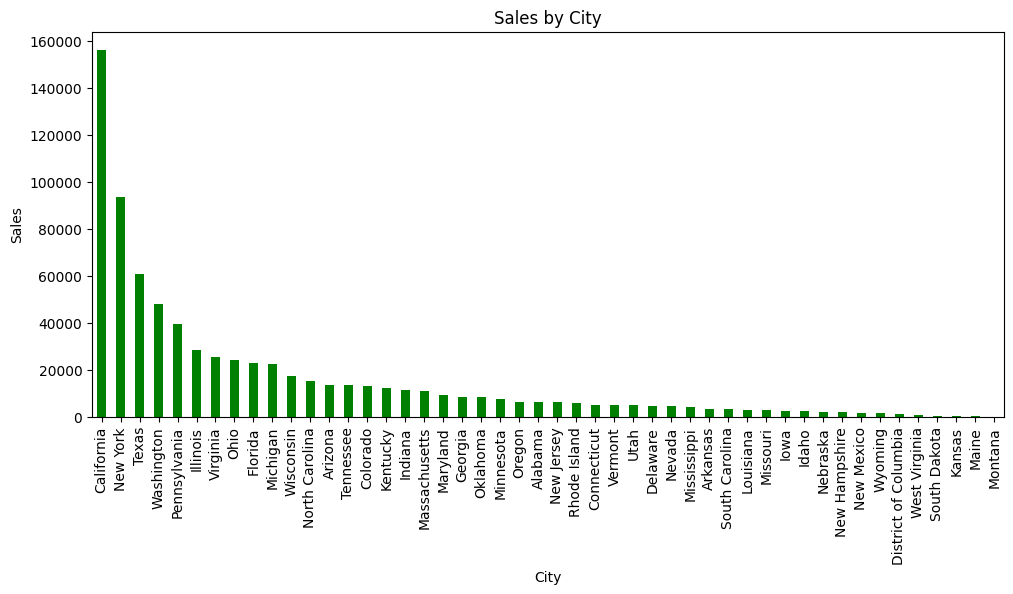

In [12]:
plot(City_sales,'Sales by City',"City",'Sales',40,5)

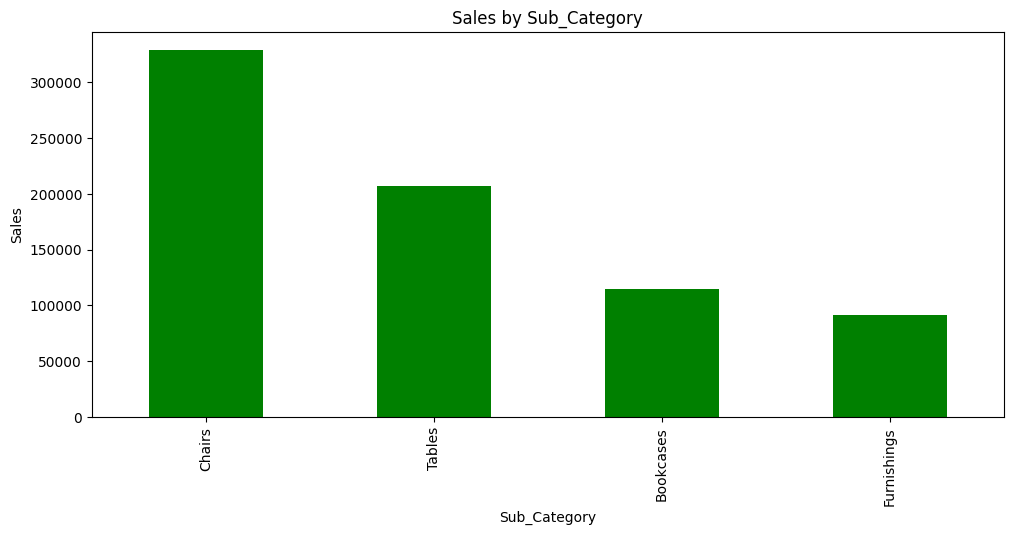

In [13]:
plot(Sub_Category_sales,'Sales by Sub_Category',"Sub_Category",'Sales',40,5)

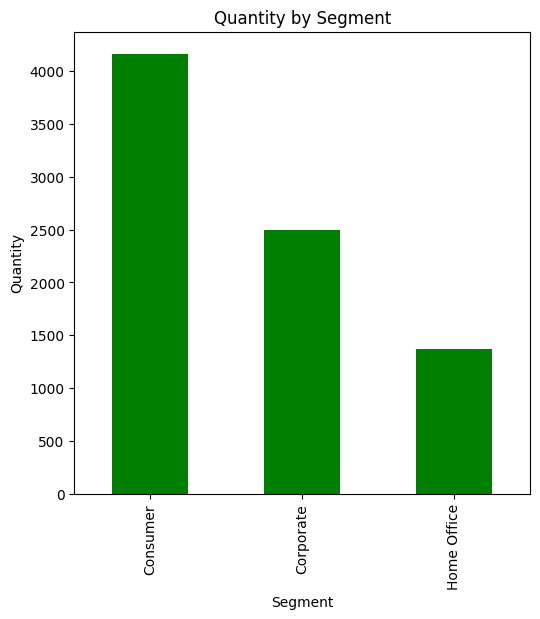

In [14]:
plot(segment_Quantity,'Quantity by Segment',"Segment",'Quantity')

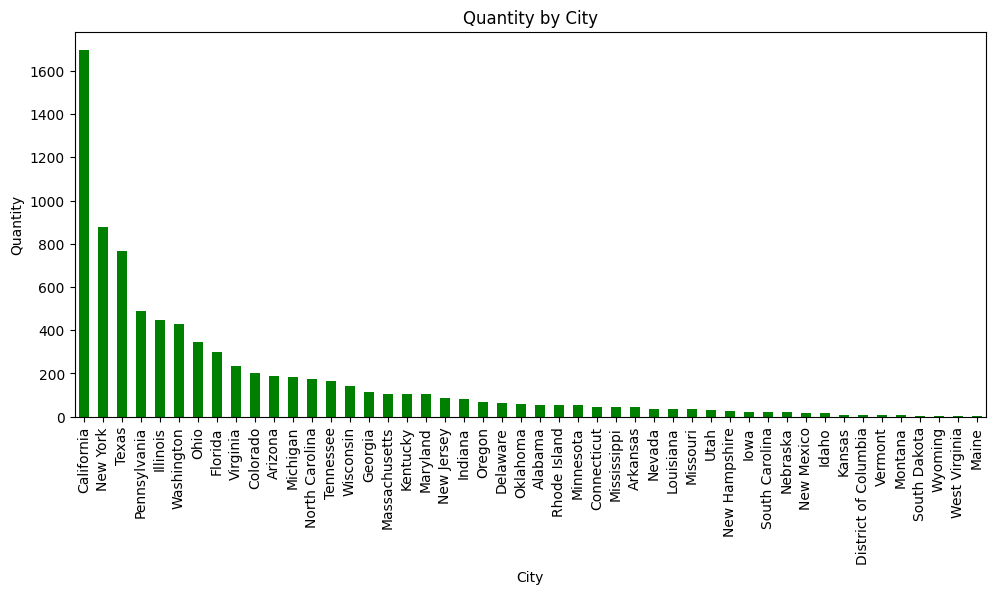

In [15]:
plot(City_Quantity,'Quantity by City',"City",'Quantity',40,5)

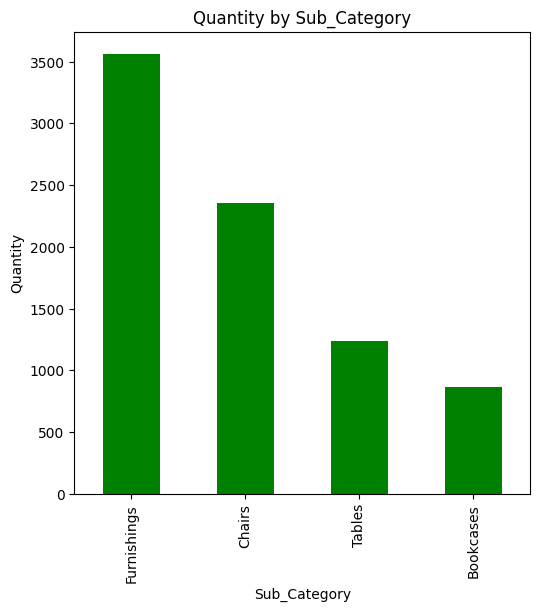

In [16]:
plot(Sub_Category_Quantity,'Quantity by Sub_Category',"Sub_Category",'Quantity')

In [17]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2121 non-null   int64         
 1   Order ID       2121 non-null   object        
 2   Order Date     2121 non-null   datetime64[ns]
 3   Ship Date      2121 non-null   datetime64[ns]
 4   Ship Mode      2121 non-null   object        
 5   Customer ID    2121 non-null   object        
 6   Customer Name  2121 non-null   object        
 7   Segment        2121 non-null   object        
 8   Country        2121 non-null   object        
 9   City           2121 non-null   object        
 10  State          2121 non-null   object        
 11  Postal Code    2121 non-null   int64         
 12  Region         2121 non-null   object        
 13  Product ID     2121 non-null   object        
 14  Category       2121 non-null   object        
 15  Sub-Category   2121 n

In [19]:
sum_quantity = df.groupby("Order Date")["Quantity"].sum().reset_index()
sum_sales = df.groupby("Order Date")["Sales"].sum().reset_index()

sum_quantity_per_date = pd.concat([sum_quantity, sum_sales['Sales']], axis=1)

sum_quantity_per_date

,Order Date,Quantity,Sales
0,2014-01-06,9,2573.8200
1,2014-01-07,3,76.7280
2,2014-01-10,1,51.9400
3,2014-01-11,2,9.9400
4,2014-01-13,9,879.9390
...,...,...,...
884,2017-12-24,14,1393.4940
885,2017-12-25,14,832.4540
886,2017-12-28,17,551.2568
887,2017-12-29,26,2330.7180


In [20]:
sum_quantity_per_date.set_index("Order Date",inplace=True)
sum_quantity_per_date["Year"] = sum_quantity_per_date.index.year
sum_quantity_per_date["Month"] = sum_quantity_per_date.index.month
sum_quantity_per_date["Day"] = sum_quantity_per_date.index.day
sum_quantity_per_date

,Quantity,Sales,Year,Month,Day
Order Date,,,,,
2014-01-06,9,2573.8200,2014,1,6
2014-01-07,3,76.7280,2014,1,7
2014-01-10,1,51.9400,2014,1,10
2014-01-11,2,9.9400,2014,1,11
2014-01-13,9,879.9390,2014,1,13
...,...,...,...,...,...
2017-12-24,14,1393.4940,2017,12,24
2017-12-25,14,832.4540,2017,12,25
2017-12-28,17,551.2568,2017,12,28


<Axes: xlabel='Order Date'>

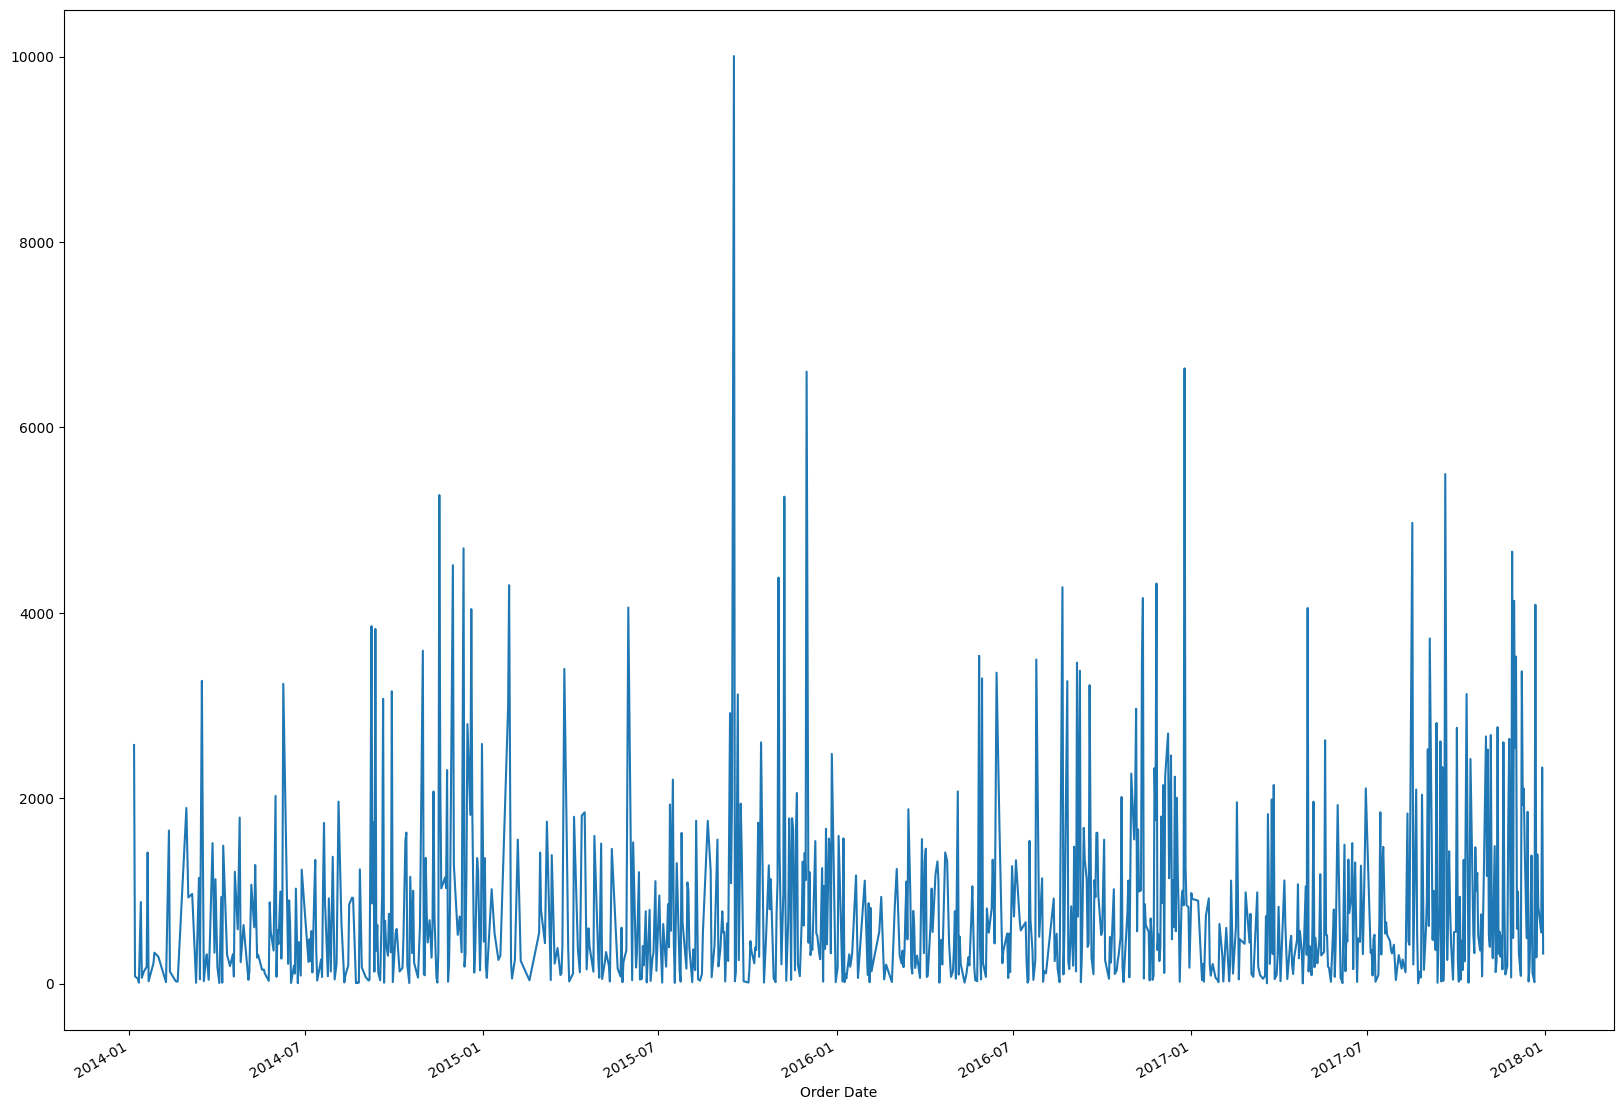

In [21]:
sum_quantity_per_date["Sales"].plot(figsize=(20,15))


<Axes: xlabel='Order Date'>

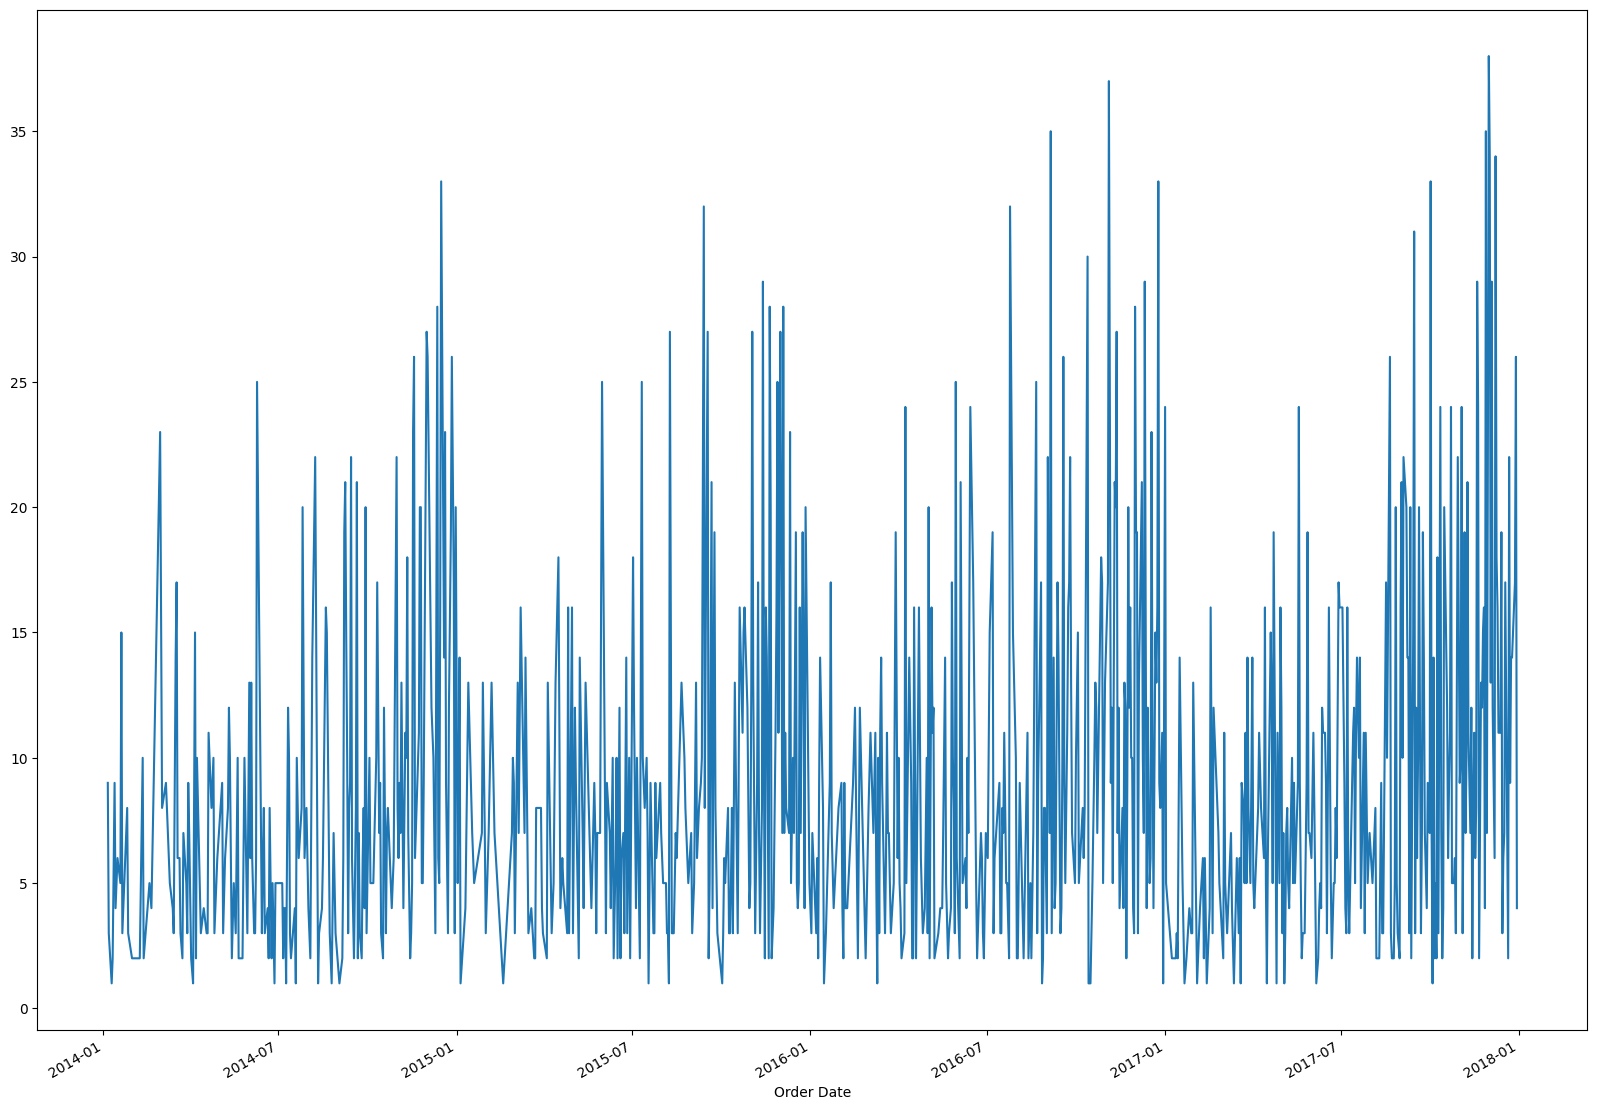

In [22]:
sum_quantity_per_date["Quantity"].plot(figsize=(20,15))


In [23]:
sum_quantity_per_date[["Sales","Quantity"]].corr()


,Sales,Quantity
Sales,1.00000,0.68968
Quantity,0.68968,1.00000


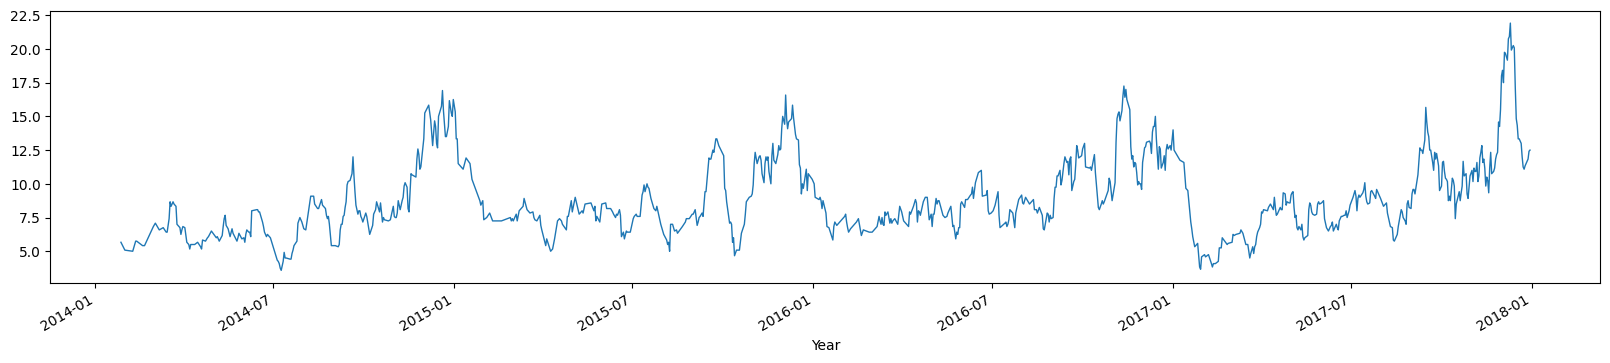

In [24]:
sum_quantity_per_date["Quantity"].rolling(12).mean().plot(figsize=(20,4), linewidth=1, fontsize=10)
plt.xlabel('Year', fontsize=10);

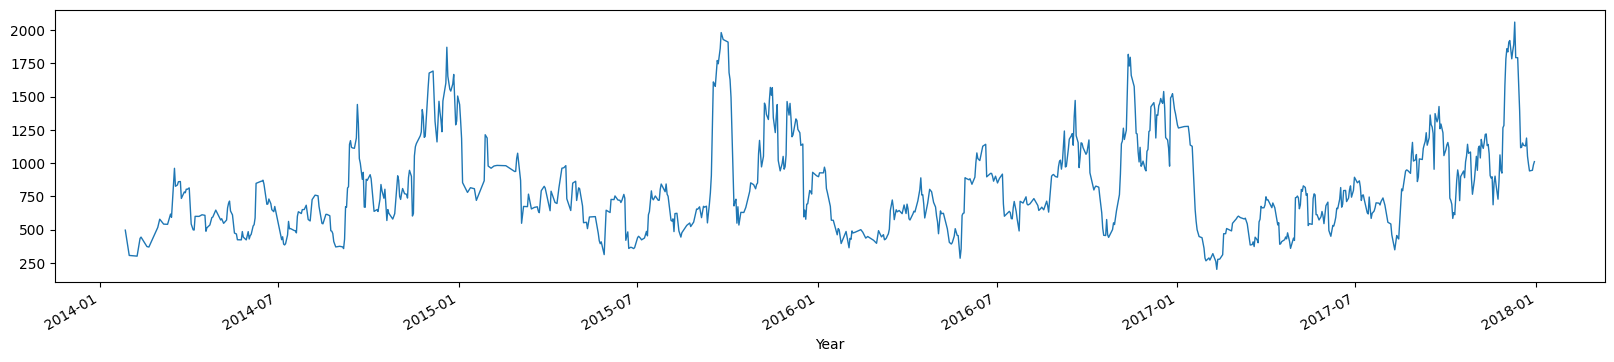

In [25]:
sum_quantity_per_date["Sales"].rolling(12).mean().plot(figsize=(20,4), linewidth=1, fontsize=10)
plt.xlabel('Year', fontsize=10);

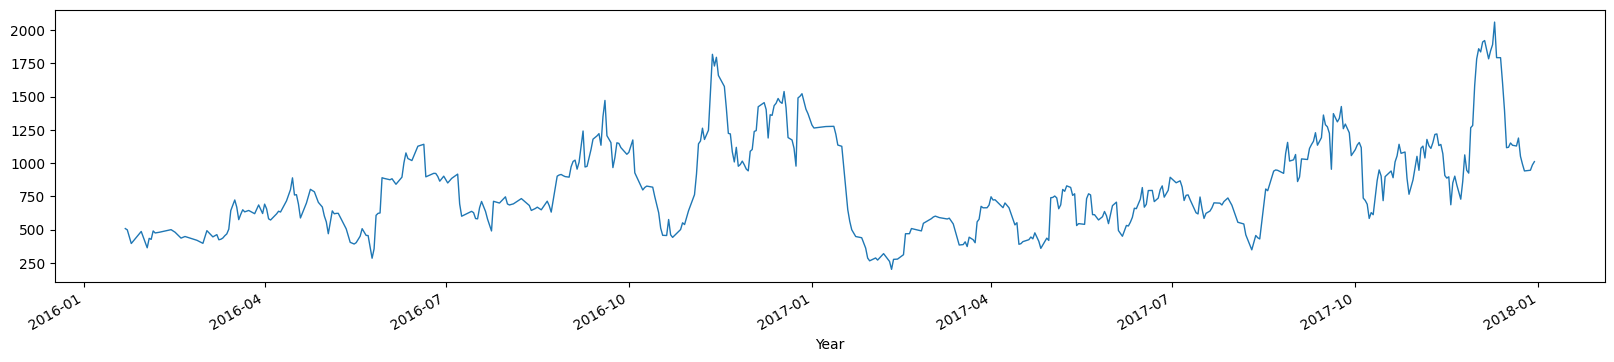

In [26]:
sum_quantity_per_date["Sales"].loc["2016":"2018"].rolling(12).mean().plot(figsize=(20,4), linewidth=1, fontsize=10)
plt.xlabel('Year', fontsize=10);

Text(0.5, 0, 'Month')

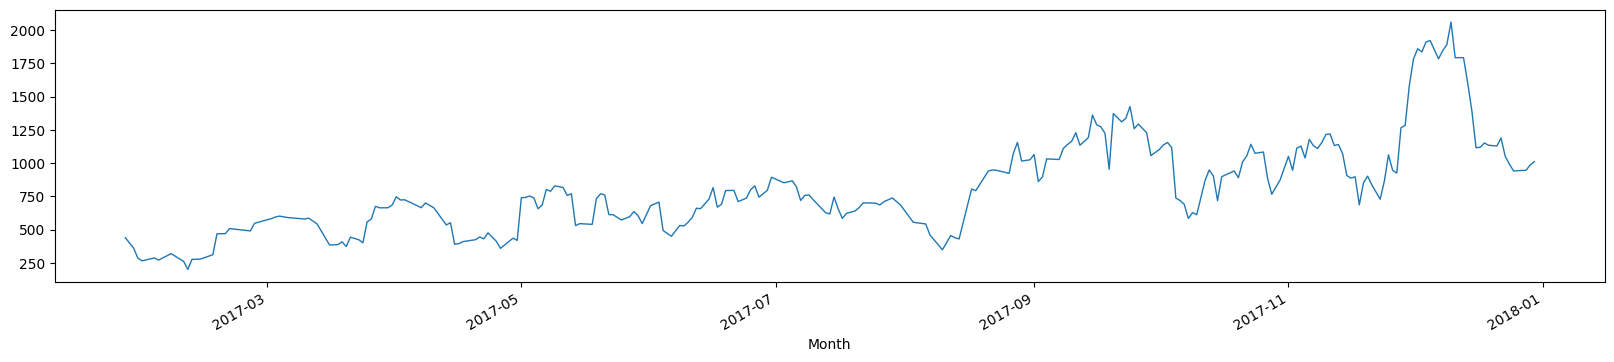

In [27]:
sum_quantity_per_date["Sales"].loc["2017"].rolling(12).mean().plot(figsize=(20,4), linewidth=1, fontsize=10)
plt.xlabel('Month', fontsize=10)

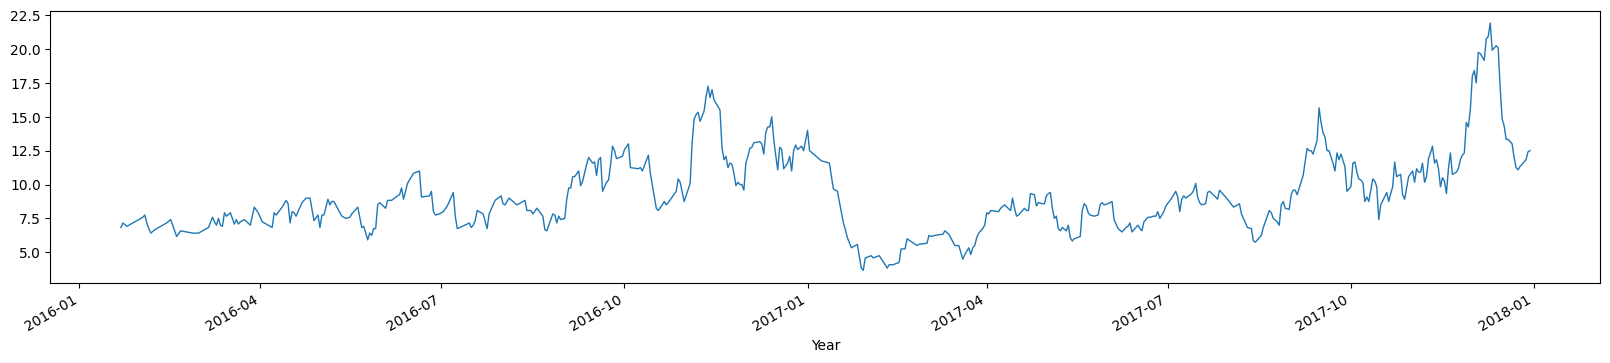

In [28]:
sum_quantity_per_date["Quantity"].loc["2016":"2018"].rolling(12).mean().plot(figsize=(20,4), linewidth=1, fontsize=10)
plt.xlabel('Year', fontsize=10);

Text(0.5, 0, 'Month')

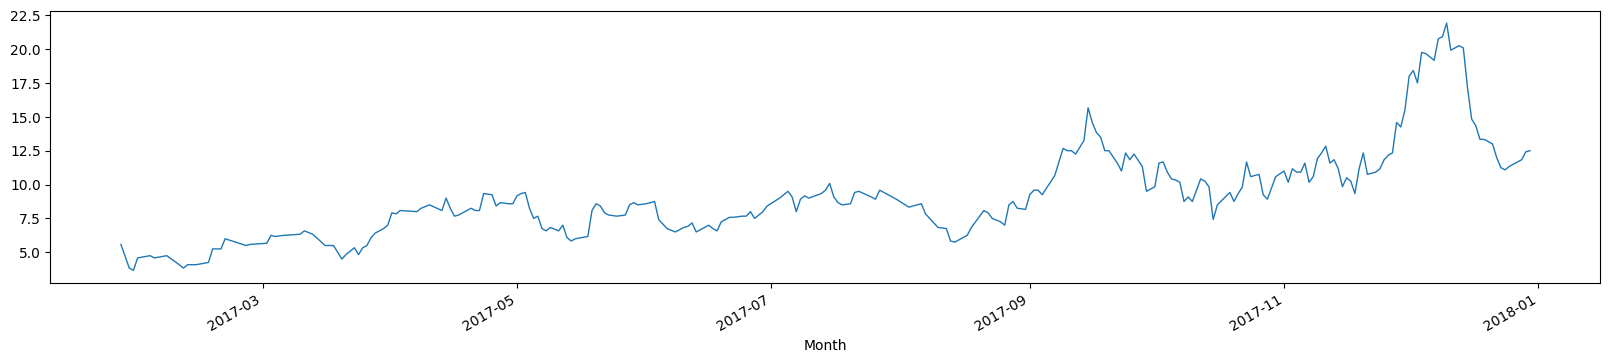

In [29]:
sum_quantity_per_date["Quantity"].loc["2017"].rolling(12).mean().plot(figsize=(20,4), linewidth=1, fontsize=10)
plt.xlabel('Month', fontsize=10)

In [30]:
train = sum_quantity_per_date["Sales"].loc[:"2017"]
test = sum_quantity_per_date["Sales"].loc["2017":]


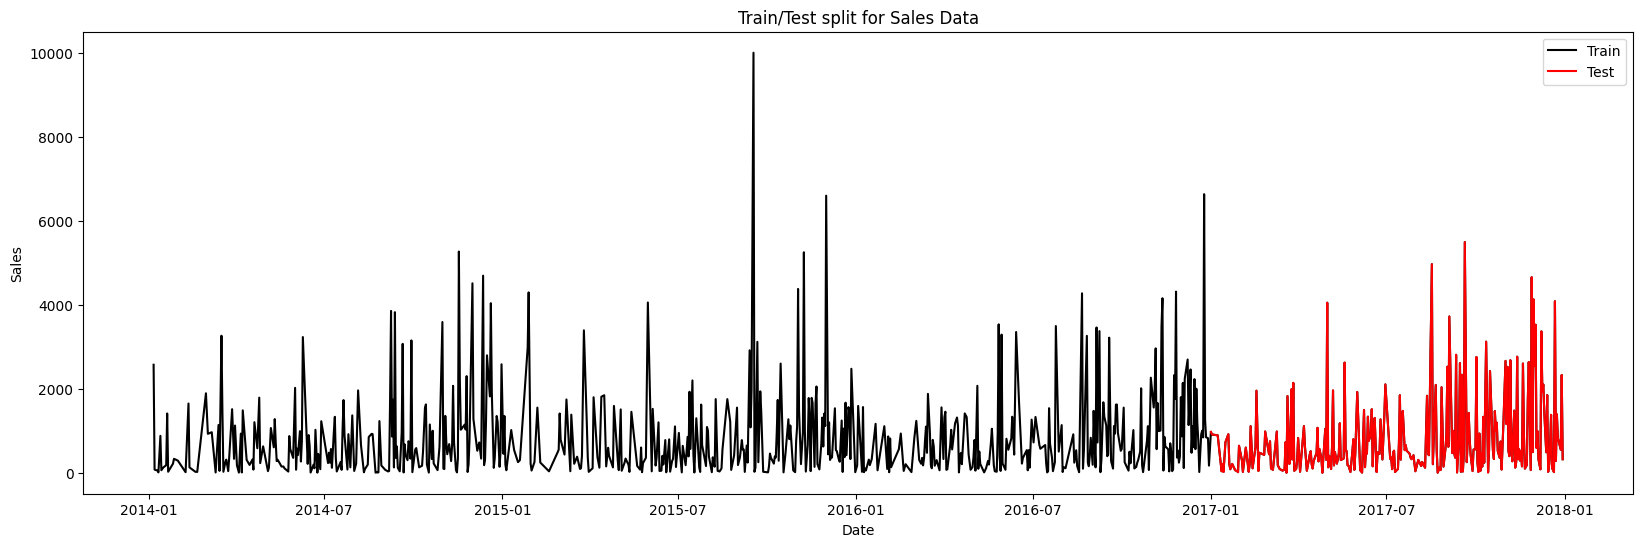

In [31]:
plt.figure(figsize=(20, 6))
plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.title("Train/Test split for Sales Data")
plt.legend()

c:\Python\python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python\python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python\python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Python\python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python\python311\Lib\site-packages\statsmodels\ts

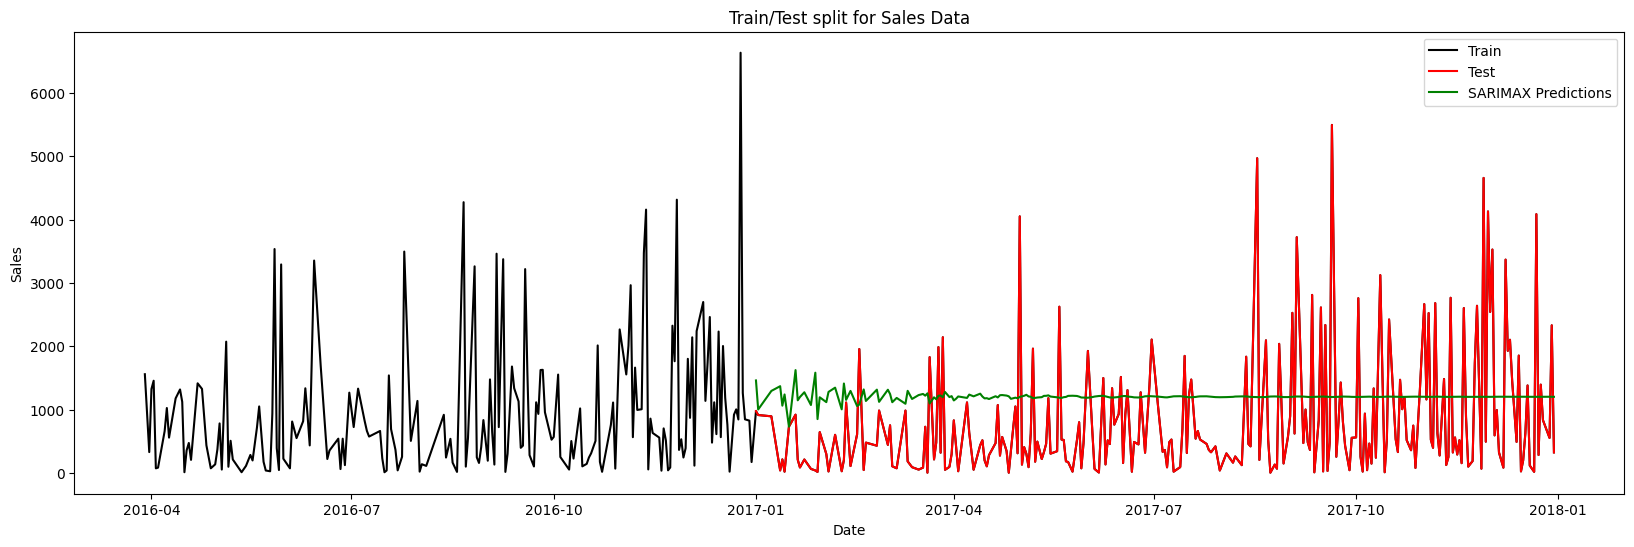

In [32]:
ARMAmodel = SARIMAX(train, order = (12, 1, 12))
ARMAmodel = ARMAmodel.fit()

y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 

y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index

y_pred_SARIMAX = y_pred_df["Predictions"]

n = int(len(train)/2)

plt.figure(figsize=(20, 6))
plt.plot(train[n:], color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.plot(y_pred_SARIMAX, color='green', label = 'SARIMAX Predictions')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.title("Train/Test split for Sales Data")
plt.legend()

In [33]:
arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  1037.1500964027996


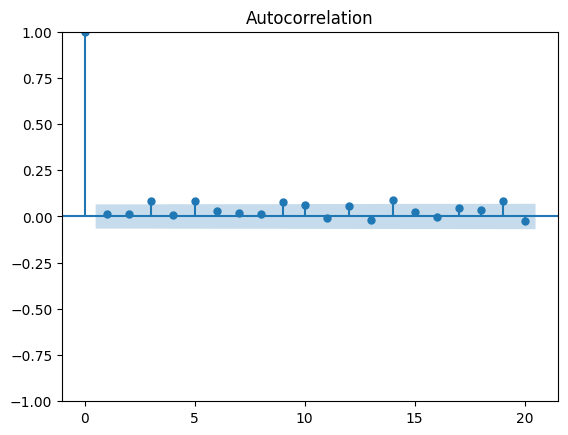

In [34]:
plot_acf(train, lags=20)
plt.show()

c:\Python\python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python\python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python\python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python\python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python\python311\Lib\sit

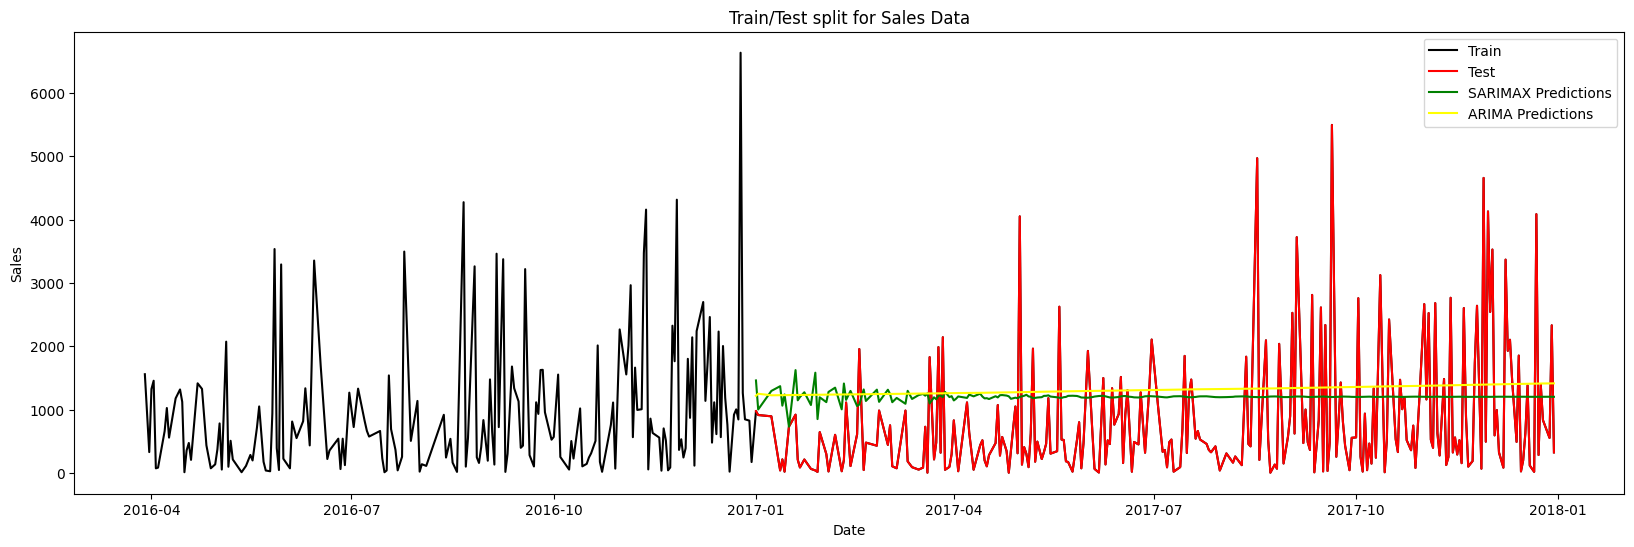

In [35]:
ARIMAmodel = ARIMA(train, order = (2, 2, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_ARIMA = y_pred_df["Predictions"]

n = int(len(train)/2)

plt.figure(figsize=(20, 6))
plt.plot(train[n:], color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.plot(y_pred_SARIMAX, color='green', label = 'SARIMAX Predictions')
plt.plot(y_pred_ARIMA, color='Yellow', label = 'ARIMA Predictions')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.title("Train/Test split for Sales Data")
plt.legend()

c:\Python\python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python\python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python\python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python\python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python\

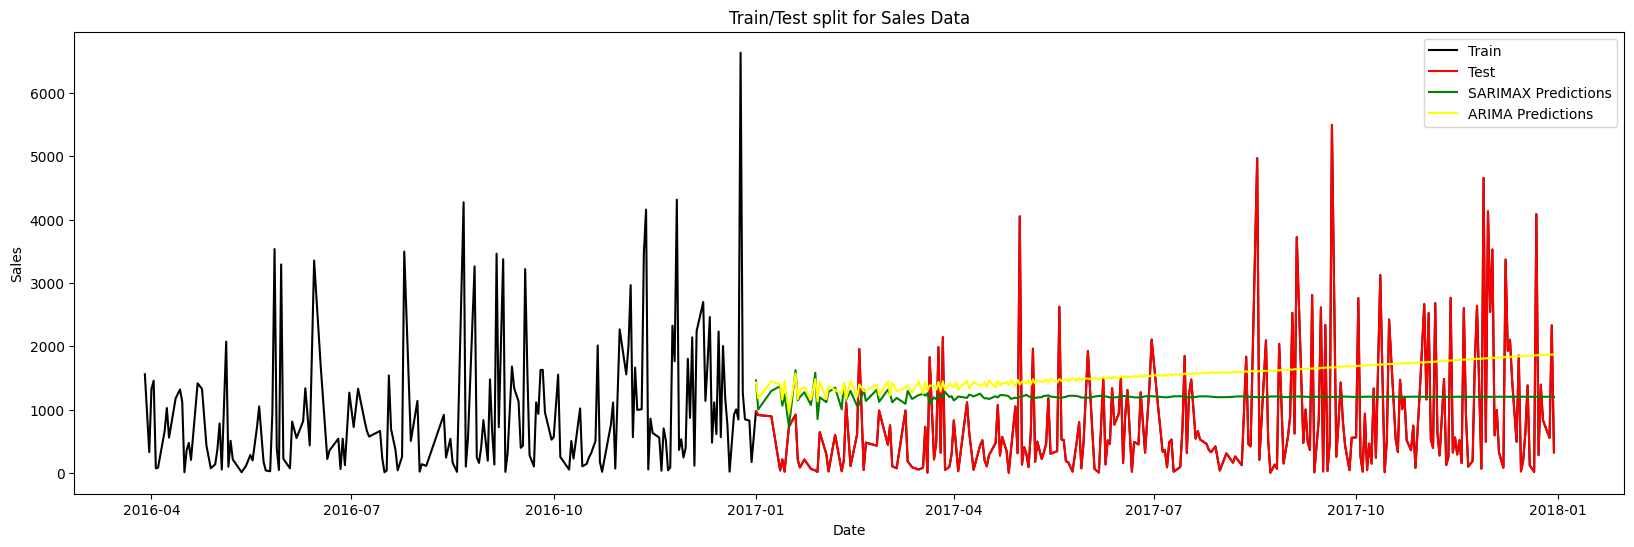

In [36]:
ARIMAmodel = ARIMA(train, order = (15, 2, 4))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_ARIMA = y_pred_df["Predictions"]

n = int(len(train)/2)

plt.figure(figsize=(20, 6))
plt.plot(train[n:], color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.plot(y_pred_SARIMAX, color='green', label = 'SARIMAX Predictions')
plt.plot(y_pred_ARIMA, color='Yellow', label = 'ARIMA Predictions')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.title("Train/Test split for Sales Data")
plt.legend()

In [37]:
arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  1185.5917372604913


c:\Python\python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python\python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python\python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python\python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Python

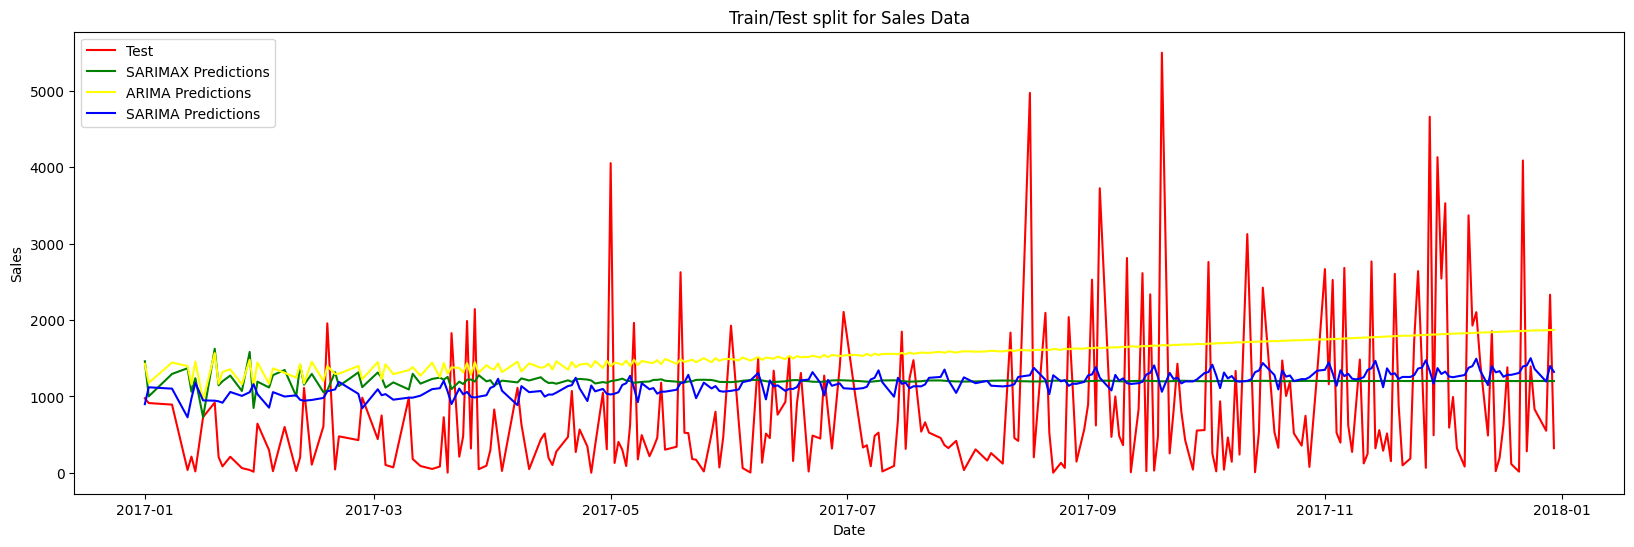

In [40]:
SARIMAXmodel = SARIMAX(train, order = (5, 1, 2), seasonal_order=(2,1,2,12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_SARIMAX_seasonal = y_pred_df["Predictions"] 


plt.figure(figsize=(20, 6))
plt.plot(test, color = "red", label = 'Test')
plt.plot(y_pred_SARIMAX, color='green', label = 'SARIMAX Predictions')
plt.plot(y_pred_ARIMA, color='Yellow', label = 'ARIMA Predictions')
plt.plot(y_pred_SARIMAX_seasonal, color='Blue', label = 'SARIMA Predictions')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.title("Train/Test split for Sales Data")
plt.legend()

In [39]:
arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  1001.2038399489998


c:\Python\python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python\python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python\python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python\python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python\python311\Lib\site-

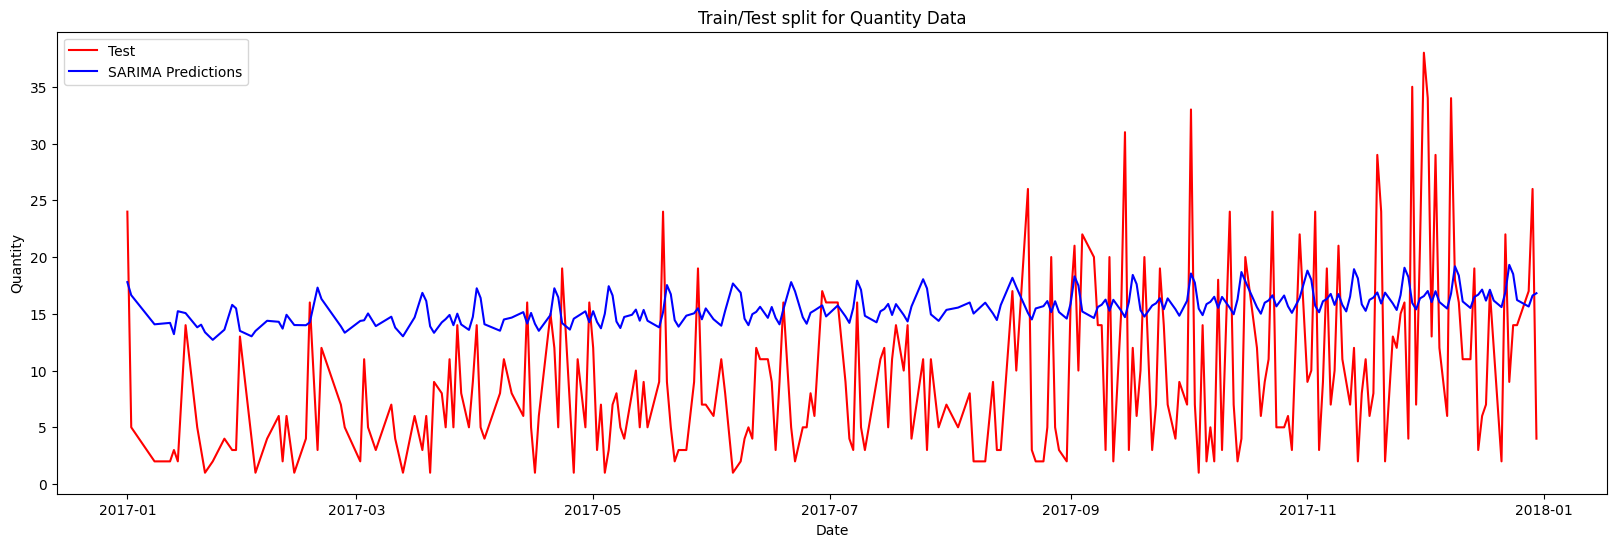

In [53]:
train = sum_quantity_per_date["Quantity"].loc[:"2017"]
test = sum_quantity_per_date["Quantity"].loc["2017":]

SARIMAXmodel = SARIMAX(train, order = (5, 1, 3), seasonal_order=(2,1,2,12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_SARIMAX_seasonal = y_pred_df["Predictions"] 


plt.figure(figsize=(20, 6))
plt.plot(test, color = "red", label = 'Test')
plt.plot(y_pred_SARIMAX_seasonal, color='Blue', label = 'SARIMA Predictions')
plt.ylabel('Quantity')
plt.xlabel('Date')
plt.title("Train/Test split for Quantity Data")
plt.legend()

In [54]:
arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  9.315396091244578


In [44]:
pd.DataFrame(y_pred_SARIMAX_seasonal)

,Predictions
Order Date,
2017-01-01,17.469162
2017-01-02,16.653387
2017-01-08,14.113997
2017-01-12,14.727381
2017-01-13,13.400670
...,...
2017-12-24,18.201297
2017-12-25,15.919473
2017-12-28,15.426723
